# BREAST CANCER TYPE PREDICTION.

![Ribbon](/content/ribbon.png)


## Required: Tumour DETAIL, also it's for patient who have cancer and want to know about the type
## Outcome: Either Malignant cancer or Benign cancer

### Tumour detail:
1. Radius (Radius of the tumour),
2. Perimeter (Perimeter of the tumour),
3. Area (Area of the tumuour),
4. Concave point (the number of indentations present on the nuclear border)
5. Worst Radius (Worst case scenario i.e radius with the max size),
6. Worst Perimeter (Worst case scenario i.e perimeter with the max size),
7. Worst Area (Worst case scenario i. area with the max size),
8. Worst Concave point (Worst case scenario i.e max numbers of indentation on nuclear border)

<b>This is for doctor's as this detail will be well knowned by doctor's helping doctor in this by providing them ML model so they can detect cancer of their patients.</b>

<b> Features </b>
1. Making detection easy, simple, less costly.
2. Working more & more in reliablity and accuracies.
3. Provided front-end interface using Streamlit

> 0 is for Bening </br>
> 1 is for Malignant.

# Importing Libraries

In [1]:
import numpy as np
import pickle # To dump & load model in pkl format
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
from matplotlib.pylab import rcParams as customize_screen # Setting screen size - PLots size

from sklearn.model_selection import train_test_split # For splitting data into training & testing
from sklearn.preprocessing import StandardScaler # For scaling the data - (-x to x)
from sklearn.preprocessing import MinMaxScaler # For Multinomial NB (0 to 1)

from sklearn.linear_model import LogisticRegression # Logistic Regression model - Sigmoid function - Good for Binary classification
from sklearn.tree import DecisionTreeClassifier # Decisiontion Tree model - Iterative Dichotomiser 3 (ID3)
from sklearn.ensemble import RandomForestClassifier # Random Forest model - Bagging Technique - Bunches of Decision Tree
from sklearn.neighbors import KNeighborsClassifier # K nearest nerighbor model - Distance Formula
from sklearn.svm import SVC # Support Vector Machine model - Hyperplane
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB # Naive Bayes model - Bayes Theorem (Condtional Probability)
from xgboost import XGBClassifier # Extreme Gradient Boosting - Boosting Technique - Penalize the gradients (loss/params])

from sklearn.metrics import accuracy_score # To calculate the accuracy of the model

customize_screen['figure.figsize'] = 15, 7 # Length, Breadth

# Loading Dataset

In [2]:
# Loading the data
data = pd.read_csv('/content/data.csv')

# EDA - Data Manipulation, Data Cleaning, Data Visualization, ...

In [3]:
# First five datapoints
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Last five datapoints
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# Row, Cols
data.shape

(569, 31)

In [6]:
# Missing Values?
data.isnull().sum().sum()

0

In [7]:
# Duplicates??
data.duplicated().sum()

0

In [8]:
# No. of elements
data.size

17639

In [9]:
# Columns
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
# No. of columns
len(data.columns)

31

In [11]:
# Dimension
data.ndim

2

<Axes: xlabel='diagnosis'>

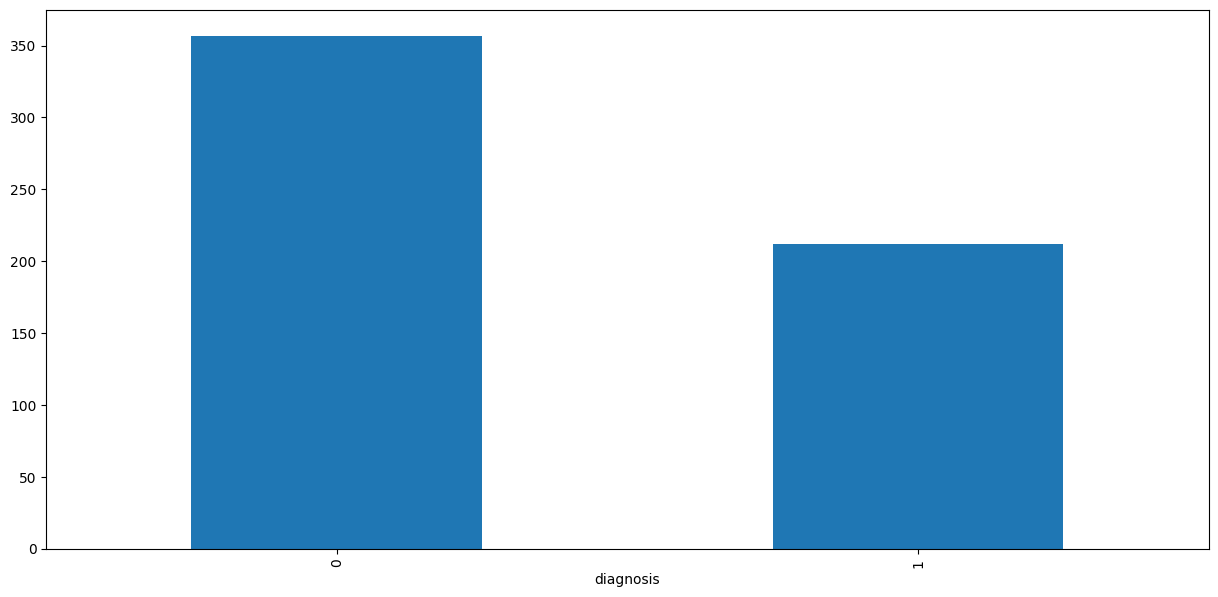

In [58]:
data['diagnosis'].value_counts().plot(kind='bar')

# Feature selection using Correlation

In [12]:
# Storing those columns with correlation above 70%
col_with_corr_above_70_percent = {}

for column in data.columns:
  data_corr = data.corr()
  if ((data_corr.loc['diagnosis', column] >= 0.7) and (data_corr.loc['diagnosis', column] != 1)) or ((data_corr.loc['diagnosis', column] <= (-0.7)) and (data_corr.loc['diagnosis', column] != 1)):
    col_with_corr_above_70_percent[column] = data_corr.loc['diagnosis', column]

updated_cols = list(col_with_corr_above_70_percent.keys())
print(f"High Positive Correlation: {list(col_with_corr_above_70_percent.values())} \nCorresponding Columns: {updated_cols}")

High Positive Correlation: [0.7300285113754563, 0.7426355297258334, 0.7089838365853902, 0.776613840020437, 0.7764537785950396, 0.7829141371737594, 0.7338250349210504, 0.7935660171412694] 
Corresponding Columns: ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [13]:
# Length of new features
print(len(updated_cols))

8


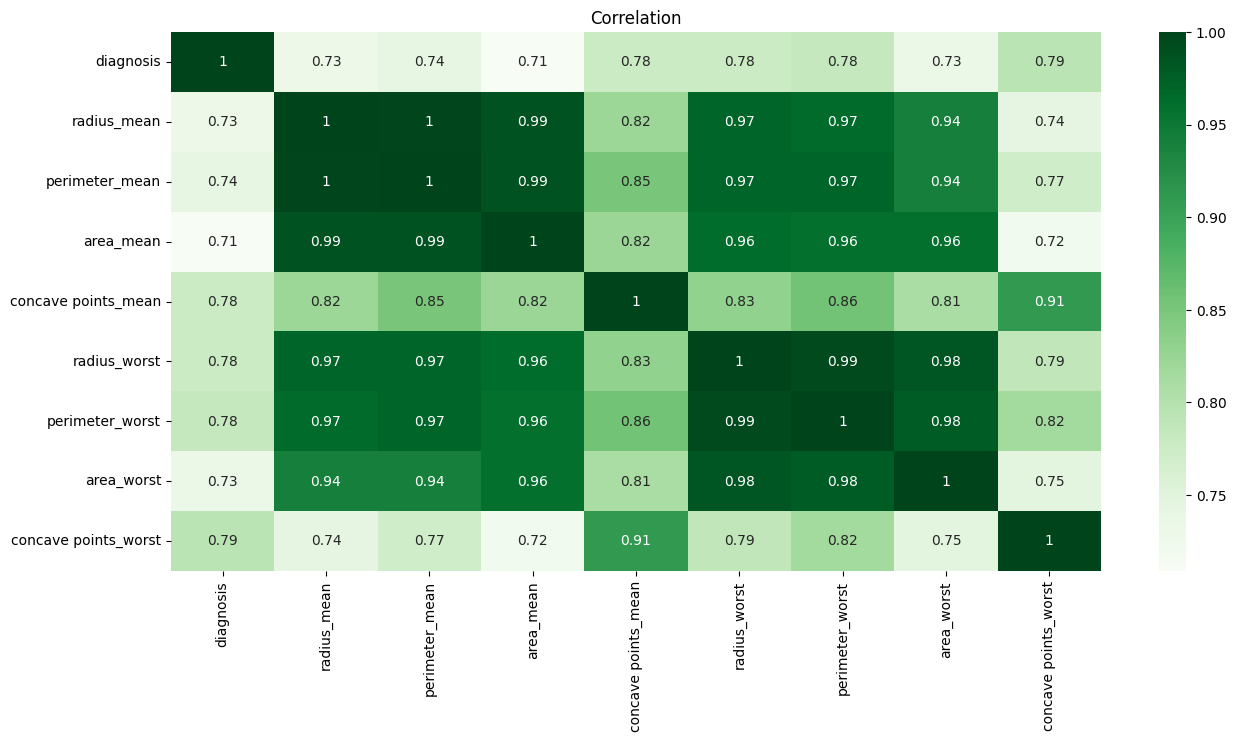

In [14]:
# Plotting Correlation
plt.figure(figsize = (15, 7))
plt.title('Correlation')
sns.heatmap(data[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']].corr(), annot = True, cmap = 'Greens')
plt.show()

We reduce the columns from 31 to 8

In [15]:
# Updated dataset
updated_cols.append('diagnosis')
data_new = data[updated_cols]

In [16]:
# Final Cols
print(data_new.columns)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst',
       'diagnosis'],
      dtype='object')


* Storing mean & std dev. of the columns as it will be needed in future.

In [17]:
# Mean & Std. dev
mean = {}
std_dev = {}

for column in data_new.columns:
  mean[column] = data_new[column].mean()
  std_dev[column] = data_new[column].std()

In [18]:
# Printing Mean & std dev
print(mean)
print(std_dev)

{'radius_mean': 14.127291739894552, 'perimeter_mean': 91.96903339191564, 'area_mean': 654.8891036906855, 'concave points_mean': 0.04891914586994726, 'radius_worst': 16.269189806678387, 'perimeter_worst': 107.26121265377857, 'area_worst': 880.5831282952548, 'concave points_worst': 0.11460622319859401, 'diagnosis': 0.37258347978910367}
{'radius_mean': 3.524048826212078, 'perimeter_mean': 24.2989810387549, 'area_mean': 351.9141291816527, 'concave points_mean': 0.03880284485915359, 'radius_worst': 4.833241580469324, 'perimeter_worst': 33.60254226903635, 'area_worst': 569.3569926699492, 'concave points_worst': 0.0657323411959421, 'diagnosis': 0.4839179564031686}


# Splitting the data

In [19]:
# Feature & Target
X = data_new.drop('diagnosis', axis = 1).values
y = data_new['diagnosis'].values

In [20]:
print(X)

[[1.799e+01 1.228e+02 1.001e+03 ... 1.846e+02 2.019e+03 2.654e-01]
 [2.057e+01 1.329e+02 1.326e+03 ... 1.588e+02 1.956e+03 1.860e-01]
 [1.969e+01 1.300e+02 1.203e+03 ... 1.525e+02 1.709e+03 2.430e-01]
 ...
 [1.660e+01 1.083e+02 8.581e+02 ... 1.267e+02 1.124e+03 1.418e-01]
 [2.060e+01 1.401e+02 1.265e+03 ... 1.846e+02 1.821e+03 2.650e-01]
 [7.760e+00 4.792e+01 1.810e+02 ... 5.916e+01 2.686e+02 0.000e+00]]


In [23]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

Feature scaling using Standard Scaler = (X - mean)/ std_dev

In [24]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
print(X_scaled)

[[ 1.09706398  1.26993369  0.9843749  ...  2.30360062  2.00123749
   2.29607613]
 [ 1.82982061  1.68595471  1.90870825 ...  1.53512599  1.89048899
   1.0870843 ]
 [ 1.57988811  1.56650313  1.55888363 ...  1.34747521  1.45628455
   1.95500035]
 ...
 [ 0.70228425  0.67267578  0.57795264 ...  0.57900058  0.42790561
   0.41406869]
 [ 1.83834103  1.98252415  1.73521799 ...  2.30360062  1.65317077
   2.28998549]
 [-1.80840125 -1.81438851 -1.34778924 ... -1.43273495 -1.07581292
  -1.74506282]]


In [26]:
# The way standard scaler works (X - mean)/ std_dev
(data_new['radius_mean'][0]-mean['radius_mean'])/std_dev['radius_mean']

1.096099529431715

In [27]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [28]:
# Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 8)
(114, 8)
(455,)
(114,)


# Model Fitting & Evaluation

First thing first, we will check the best value of K in KNN

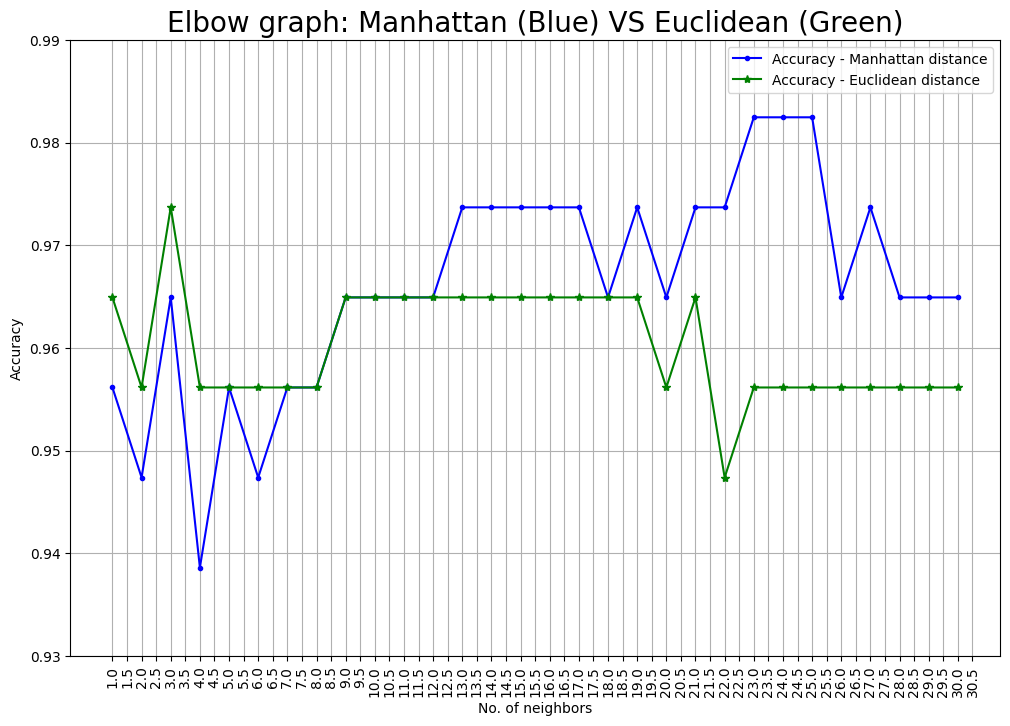

In [29]:
# Accuracy
accuracies_manhattan = []
accuracies_euclidean = []

# Elbow method for optimal K value
def optimal_knn():
  for i in range(1,3):
    for j in range(1, 31):
      knn = KNeighborsClassifier(n_neighbors = j, p = i)
      knn.fit(X_train, y_train)
      y_pred = knn.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      if i == 1: # Manhattan distance - Absolute
        accuracies_manhattan.append(accuracy)
      else: # Euclidean distance - Square root of sum of the square of diatance
        accuracies_euclidean.append(accuracy)

# Visualizing Elbow
def visual_optimal_knn ():
  plt.figure(figsize = (12, 8))
  plt.title('Elbow graph: Manhattan (Blue) VS Euclidean (Green)', fontsize=20)
  plt.xlabel('No. of neighbors')
  plt.ylabel('Accuracy')
  plt.plot(range(1, 31), accuracies_manhattan, 'b', marker='.', label='Accuracy - Manhattan distance')
  plt.plot(range(1, 31), accuracies_euclidean, 'g', marker='*', label='Accuracy - Euclidean distance')
  plt.xticks(np.arange(1, 31, 0.5), rotation=90)
  plt.yticks(np.arange(0.93, 1.0, 0.01))
  plt.legend()
  plt.grid()
  plt.show()

# Final function for optimal K finding
def check_optimal_knn():
  optimal_knn()
  visual_optimal_knn()

check_optimal_knn()

Highest accuracy is when the neighbor value is set to just 1

Let's set all the model now


In [30]:
# For storing all the models
models = []

# Append model instances to the list
models.append(LogisticRegression(max_iter=200, solver='liblinear'))
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(KNeighborsClassifier(n_neighbors=23, p=1))
models.append(SVC())
models.append(GaussianNB())
models.append(MultinomialNB())
models.append(BernoulliNB())
models.append(XGBClassifier())

# Print models
for model in models:
  print(model)

LogisticRegression(max_iter=200, solver='liblinear')
DecisionTreeClassifier()
RandomForestClassifier()
KNeighborsClassifier(n_neighbors=23, p=1)
SVC()
GaussianNB()
MultinomialNB()
BernoulliNB()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


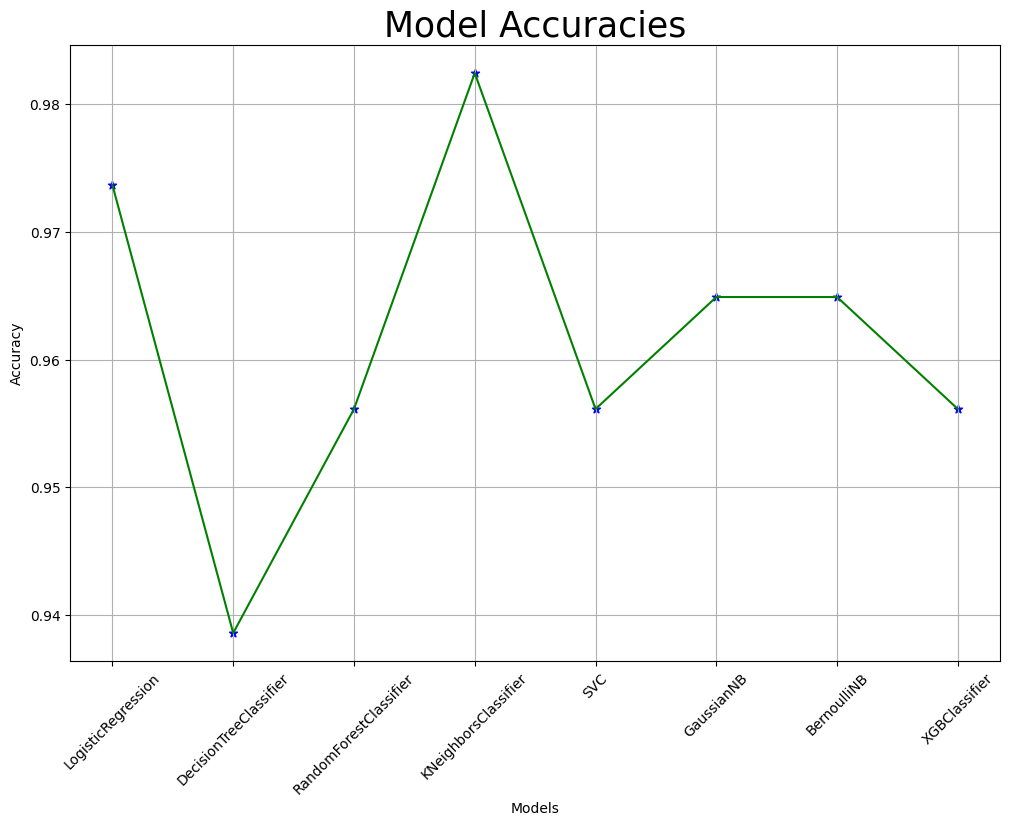

In [31]:
# All model accuracies
all_model_accuracy = {}

# Finding models accuracies
def models_accuracies():
  # Finding accuracy
  for model in models:
    if model == models[-3]: # Skipping Multinomial NB as we scaled our data
      continue
    else:
      model.fit(X_train, y_train)
      all_model_accuracy[str(model).split('(')[0]] = accuracy_score(y_test, model.predict(X_test))

# Plotting models accuracies
def model_accuracies_graph():
  plt.figure(figsize = (12, 8))
  plt.title('Model Accuracies', fontsize=25)
  plt.xlabel('Models')
  plt.ylabel('Accuracy')
  plt.scatter(all_model_accuracy.keys(), all_model_accuracy.values(), marker='*', color='b')
  plt.plot(all_model_accuracy.keys(), all_model_accuracy.values(), color='g')
  plt.xticks(rotation = 45)
  plt.grid()
  plt.show()

# Testing all models
def check_all_model_accuracy():
  models_accuracies()
  model_accuracies_graph()

check_all_model_accuracy()

Checking Accuracy of Multinomial NB

In [32]:
# Initialize the scaler - Range (0 to 1)
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled_MNB = scaler.fit_transform(X)

# Train_MNB - Test_MNB split for Mulitnomial Naive Bayes
X_train_MNB, X_test_MNB, y_train_MNB, y_test_MNB = train_test_split(X_scaled_MNB, y, test_size = 0.2, random_state = 42)

In [33]:
# Testing MNB & stroing in all_model_accuracy dict
models[-3].fit(X_train_MNB, y_train_MNB)
all_model_accuracy['MultinomialNB'] = accuracy_score(y_test_MNB, models[-3].predict(X_test_MNB))
print(f"Accuracy of Multinomial NB: {accuracy_score(y_test_MNB, models[-3].predict(X_test_MNB))}")

Accuracy of Multinomial NB: 0.6228070175438597


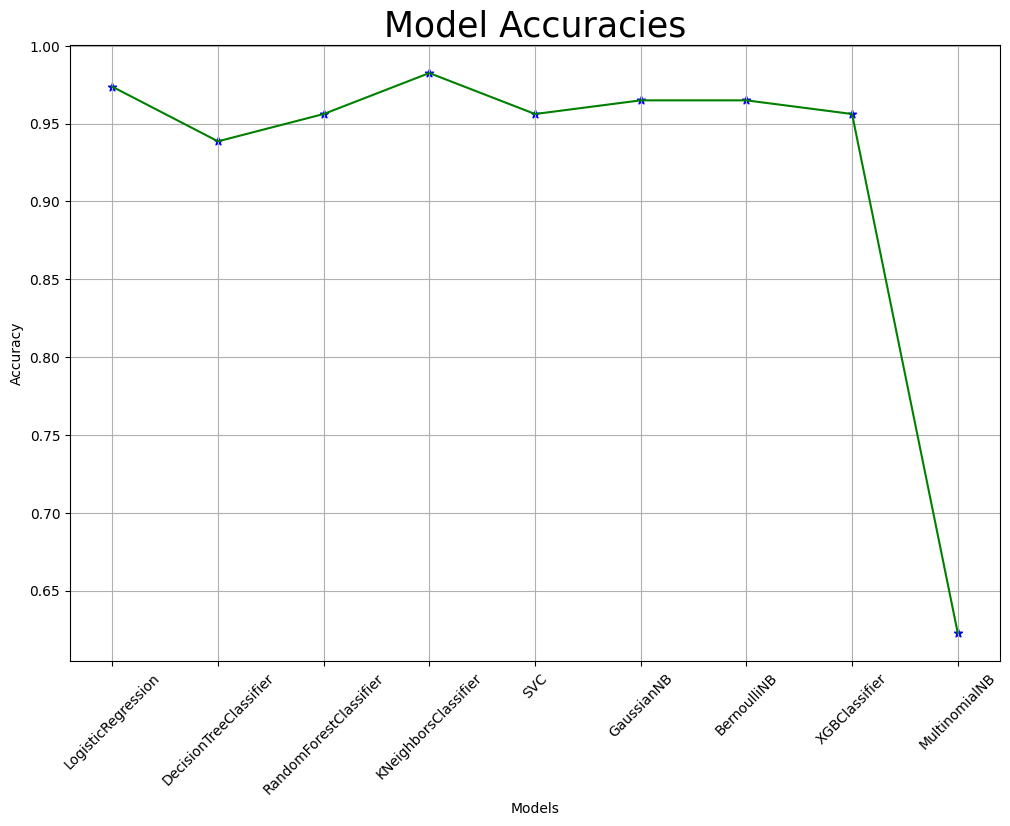

In [34]:
# Replotting all
model_accuracies_graph()

We can conclude that MNB is the worst model for this case. While, KNN being the best for this case.

In [35]:
# KNN Accuracy
print(f"Accuracy of KNN: {(all_model_accuracy['KNeighborsClassifier']*100):.4f}%")

Accuracy of KNN: 98.2456%


KNN (KNeighborsClassifier(n_neighbors=23, p=1)) accuracy is around 98%

# Best Model Hyperparameter Tune (KNN & LR)

* KNN

In [36]:
from sklearn.model_selection import RandomizedSearchCV # For hyperparameter tune
import warnings
warnings.filterwarnings("ignore") # Hide warnings

In [37]:
# Define the KNN model
knn = KNeighborsClassifier()

In [38]:
# Define the expanded parameter grid
param_dist = {
    'n_neighbors': np.arange(1, 31),  # Testing neighbors from 1 to 30
    'weights': ['uniform', 'distance'],  # Weighting methods
    'p': [1, 2],  # Distance metrics: 1 for Manhattan, 2 for Euclidean
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm options
    'leaf_size': np.arange(1, 51),  # Leaf size from 1 to 50
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metrics
}

In [39]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist,
                                   n_iter=100,  # Number of iterations for random search
                                   scoring='accuracy',  # Evaluation metric
                                   cv=5,  # Number of cross-validation folds
                                   random_state=42)

In [40]:
# Fit the random search model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [41]:
# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found: ", best_params)

Best hyperparameters found:  {'weights': 'distance', 'p': 1, 'n_neighbors': 4, 'metric': 'minkowski', 'leaf_size': 10, 'algorithm': 'ball_tree'}


In [42]:
# Evaluate the best model
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the best model: {:.4f}%".format(accuracy * 100))

Accuracy of the best model: 96.4912%


* Logictic Regression

In [43]:
# Define the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Define the parameter grid for Logistic Regression
param_dist_log_reg = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization types
}

# Initialize RandomizedSearchCV
random_search_log_reg = RandomizedSearchCV(log_reg, param_distributions=param_dist_log_reg,
                                           n_iter=200,  # Number of iterations for random search
                                           scoring='accuracy',  # Evaluation metric
                                           cv=5,  # Number of cross-validation folds
                                           random_state=42)

# Fit the random search model
random_search_log_reg.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
best_params_log_reg = random_search_log_reg.best_params_
print("Best hyperparameters for Logistic Regression: ", best_params_log_reg)

# Evaluate the best Logistic Regression model
best_log_reg = random_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Accuracy of the best Logistic Regression model: {:.2f}%".format(accuracy_log_reg * 100))

Best hyperparameters for Logistic Regression:  {'penalty': 'l1', 'C': 1.623776739188721}
Accuracy of the best Logistic Regression model: 98.25%


## Conclusion and Impressions from Hyperparameter Tuning

- **K-Nearest Neighbors (KNN)**:
  - **Performance Before Tuning**: The KNN model achieved an impressive accuracy of **98.2456%** prior to hyperparameter tuning.
  - **Performance After Tuning**: Post-tuning, the accuracy decreased to **96.4912%**.
  - **Reliability Concerns**: The significant drop in accuracy raises concerns about the model's reliability. This fluctuation might be attributed to increased complexity introduced during hyperparameter tuning. The KNN model's performance may also be sensitive to data distribution and the choice of hyperparameters, leading to variability.

- **Logistic Regression**:
  - **Performance Before Tuning**: The Logistic Regression model started with an accuracy of approximately **97%**.
  - **Performance After Tuning**: After hyperparameter tuning, the accuracy improved to **98.25%**.
  - **Stability and Reliability**: The improvement in accuracy and the relatively stable performance suggest that Logistic Regression is more robust. It seems less affected by the complexities of the dataset, providing a more consistent predictive capability.

- **Final Decision**:
  - Given the findings, KNN may not be the most reliable choice due to its fluctuating performance and sensitivity to hyperparameters.
  - Logistic Regression, with its better performance and stability post-tuning, is the safer option for our breast cancer prediction model.
  - Overall, selecting Logistic Regression aligns with our goal of developing a model that not only performs well but is also reliable in real-world applications.

In [44]:
# Create the final Logistic Regression model with the best hyperparameters
final_log_reg = LogisticRegression(penalty='l1', C=1.623776739188721, solver='liblinear')

# Fit the model on the training data
final_log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_final = final_log_reg.predict(X_test)

# Evaluate the accuracy of the final model
accuracy_final = accuracy_score(y_test, y_pred_final)

print("Accuracy of the final Logistic Regression model: {:.2f}%".format(accuracy_final * 100))

Accuracy of the final Logistic Regression model: 98.25%


# Predictions

In [45]:
# Predictions stored in dataframe named Preds
preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final})

In [46]:
# First five preds
preds.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


In [47]:
# Wrong preds
preds[preds['Actual'] != preds['Predicted']]

,Actual,Predicted
82,1,0
108,0,1


# Using pickle to dumping and loading of model

In [48]:
# Logistic Regression
final_log_reg

LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear')

In [49]:
pickle.dump(final_log_reg, open ('Breast_Cancer_Model_Log_Reg_98_percent.pkl', 'wb')) # Logistic Regression model
pickle.dump(best_knn, open ('Breast_Cancer_Model_KNN_96_percent.pkl', 'wb')) # KNN model - Storing for safer side

# Streamlit Front-end interface

* Testing first

In [50]:
# Load the model
model_log_reg = pickle.load(open('/content/Breast_Cancer_Model_Log_Reg_98_percent.pkl', 'rb'))
model_knn = pickle.load(open('/content/Breast_Cancer_Model_KNN_96_percent.pkl', 'rb')) # Loading as second option

In [51]:
# Logistic Regression
model_log_reg

LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear')

In [52]:
# KNN
model_knn

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1,
                     weights='distance')

In [53]:
# Cols - For giving reasonable value
data_new.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst',
       'diagnosis'],
      dtype='object')

In [54]:
# Three datapoints for 0 from data_new
data_new[data_new['diagnosis'] == 0].head(3)

,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
19,13.540,87.46,566.3,0.04781,15.11,99.70,711.2,0.12880,0
20,13.080,85.63,520.0,0.03110,14.50,96.09,630.5,0.07283,0
21,9.504,60.34,273.9,0.02076,10.23,65.13,314.9,0.06227,0


<b> Note: Scale data while giving for prediction. </b>

In [55]:
# Loading dictionary here for ease
print(mean)
print(std_dev)

{'radius_mean': 14.127291739894552, 'perimeter_mean': 91.96903339191564, 'area_mean': 654.8891036906855, 'concave points_mean': 0.04891914586994726, 'radius_worst': 16.269189806678387, 'perimeter_worst': 107.26121265377857, 'area_worst': 880.5831282952548, 'concave points_worst': 0.11460622319859401, 'diagnosis': 0.37258347978910367}
{'radius_mean': 3.524048826212078, 'perimeter_mean': 24.2989810387549, 'area_mean': 351.9141291816527, 'concave points_mean': 0.03880284485915359, 'radius_worst': 4.833241580469324, 'perimeter_worst': 33.60254226903635, 'area_worst': 569.3569926699492, 'concave points_worst': 0.0657323411959421, 'diagnosis': 0.4839179564031686}


In [56]:
# Testing loaded model - Logistic Regression
print(model_log_reg.predict(
    [
        [((18 - mean['radius_mean'])/std_dev['radius_mean']), # First feature
         ((122 - mean['perimeter_mean'])/std_dev['perimeter_mean']), # Second feature
         ((1001 - mean['area_mean'])/std_dev['area_mean']), # Third feature
         ((0.15 - mean['concave points_mean'])/std_dev['concave points_mean']), # Fourth feature
         ((25 - mean['radius_worst'])/std_dev['radius_worst']), # Fifth feature
         ((184.6 - mean['perimeter_worst']/std_dev['perimeter_worst'])), # Sixth feature
         ((2019 - mean['area_worst'])/std_dev['area_worst']), # Seventh feature
         ((0.27 - mean['concave points_worst'])/std_dev['concave points_worst'])] # Eight feature
    ]
)) # This one should corresponds 1

print(model_log_reg.predict(
    [
        [((8 - mean['radius_mean'])/std_dev['radius_mean']), # First feature
         ((51 - mean['perimeter_mean'])/std_dev['perimeter_mean']), # Second feature
         ((201 - mean['area_mean'])/std_dev['area_mean']), # Third feature
         ((0.007 - mean['concave points_mean'])/std_dev['concave points_mean']), # Fourth feature
         ((9.507 - mean['radius_worst'])/std_dev['radius_worst']), # Fifth feature
         ((60 - mean['perimeter_worst']/std_dev['perimeter_worst'])), # Sixth feature
         ((275 - mean['area_worst'])/std_dev['area_worst']), # Seventh feature
         ((0.04 - mean['concave points_worst'])/std_dev['concave points_worst'])] # Eight feature
    ]
)) # This one should corresponds 0

# Testing loaded model - KNN
print(model_knn.predict(
    [
        [((18 - mean['radius_mean'])/std_dev['radius_mean']), # First feature
         ((122 - mean['perimeter_mean'])/std_dev['perimeter_mean']), # Second feature
         ((1001 - mean['area_mean'])/std_dev['area_mean']), # Third feature
         ((0.15 - mean['concave points_mean'])/std_dev['concave points_mean']), # Fourth feature
         ((25 - mean['radius_worst'])/std_dev['radius_worst']), # Fifth feature
         ((184.6 - mean['perimeter_worst']/std_dev['perimeter_worst'])), # Sixth feature
         ((2019 - mean['area_worst'])/std_dev['area_worst']), # Seventh feature
         ((0.27 - mean['concave points_worst'])/std_dev['concave points_worst'])] # Eight feature
    ]
)) # This one should corresponds 1

print(model_knn.predict(
    [
        [((8 - mean['radius_mean'])/std_dev['radius_mean']), # First feature
         ((51 - mean['perimeter_mean'])/std_dev['perimeter_mean']), # Second feature
         ((201 - mean['area_mean'])/std_dev['area_mean']), # Third feature
         ((0.007 - mean['concave points_mean'])/std_dev['concave points_mean']), # Fourth feature
         ((9.507 - mean['radius_worst'])/std_dev['radius_worst']), # Fifth feature
         ((60 - mean['perimeter_worst']/std_dev['perimeter_worst'])), # Sixth feature
         ((275 - mean['area_worst'])/std_dev['area_worst']), # Seventh feature
         ((0.04 - mean['concave points_worst'])/std_dev['concave points_worst'])] # Eight feature
    ]
)) # This one should corresponds 0

[1]
[0]
[1]
[0]


* Streamlit portion

In [57]:
# Streamlit installation
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.5 MB/s eta 0:00:00


In [65]:
%%writefile app.py
# Importing
import pickle
import streamlit as st

# Load models
model_log_reg = pickle.load(open('/content/Breast_Cancer_Model_Log_Reg_98_percent.pkl', 'rb'))
model_knn = pickle.load(open('/content/Breast_Cancer_Model_KNN_96_percent.pkl', 'rb'))

# Mean and Standard Deviation dictionaries for scaling
mean = {'radius_mean': 14.127291739894552,
        'perimeter_mean': 91.96903339191564,
        'area_mean': 654.8891036906855,
        'concave points_mean': 0.04891914586994726,
        'radius_worst': 16.269189806678387,
        'perimeter_worst': 107.26121265377857,
        'area_worst': 880.5831282952548,
        'concave points_worst': 0.11460622319859401,
        'diagnosis': 0.37258347978910367
}

std_dev = {'radius_mean': 3.524048826212078,
           'perimeter_mean': 24.2989810387549,
           'area_mean': 351.9141291816527,
           'concave points_mean': 0.03880284485915359,
           'radius_worst': 4.833241580469324,
           'perimeter_worst': 33.60254226903635,
           'area_worst': 569.3569926699492,
           'concave points_worst': 0.0657323411959421,
           'diagnosis': 0.4839179564031686
}

# Project description on web interface
st.title("Breast Cancer Type Prediction")
st.header("Leveraging Machine Learning for Early Detection")
st.markdown("""
    This application uses advanced machine learning algorithms to predict breast cancer types (Benign or Malignant)
    based on various features. After testing multiple models, we have selected the most reliable
    model to ensure accurate predictions with hyperparameter tuning and cross-validation for improved reliability.
    Our goal is to assist in early diagnosis and improve patient outcomes.
""")

# Model Accuracy Metrics - Default way. Both are displayed
# st.metric(label="Logistic Regression accuracy", value="98.25%", delta="Up 1.25% from previous model")
# st.metric(label="KNN accuracy", value="96.49%", delta="Down 1.75% from Logistic Regression")

# Model selection
model_choice = st.selectbox("Choose a model for prediction", ("Logistic Regression", "KNN"))
model = model_log_reg if model_choice == "Logistic Regression" else model_knn

# Display model-specific accuracy metric - Display only the one selected.
if model_choice == "Logistic Regression":
    st.metric(label="Logistic Regression accuracy", value="98.25%", delta="Up 1.25% from previous model")
elif model_choice == "KNN":
    st.metric(label="KNN accuracy", value="96.49%", delta="Down 1.75% from Logistic Regression")

# Taking input from user with adjusted ranges for each slider
radius_mean = st.slider("Enter the radius mean", 6.0, 30.0, 0.1)
perimeter_mean = st.slider("Enter the perimeter mean", 40.0, 200.0, 0.5)
area_mean = st.slider("Enter the area mean", 100.0, 2500.0, 5.0)
concave_points_mean = st.slider("Enter the concave points mean", 0.0, 0.2, 0.001)
radius_worst = st.slider("Enter the radius worst", 7.0, 40.0, 0.5)
perimeter_worst = st.slider("Enter the perimeter worst", 50.0, 250.0, 0.5)
area_worst = st.slider("Enter the area worst", 200.0, 5000.0, 10.0)
concave_points_worst = st.slider("Enter the concave points worst", 0.0, 0.3, 0.001)

# Scaling function
def scale_input(input_data):
    # Using zip to directly pair each feature value with its mean and std_dev
    return [(value - mean[key]) / std_dev[key] for value, key in zip(input_data, mean.keys())]

# Prediction
scaled_data = scale_input([radius_mean, perimeter_mean, area_mean, concave_points_mean,
                           radius_worst, perimeter_worst, area_worst, concave_points_worst])
pred = model.predict([scaled_data])
result = "Benign" if pred[0] == 0 else "Malignant"

# # Output - Default Streamlit
# if st.button("Predict"):
#     st.success(f"The predicted breast cancer type is {result}")

# Output - Custom HTML in Streamlit
if st.button("Predict"):
    if result == "Benign":
        st.markdown(f'<p style="color:green; font-size:24px;">The predicted breast cancer type is {result}</p>', unsafe_allow_html=True)
    else:
        st.markdown(f'<p style="color:red; font-size:24px;">The predicted breast cancer type is {result}</p>', unsafe_allow_html=True)

Overwriting app.py


In [66]:
# Curl is to find the address
!curl https://loca.lt/mytunnelpassword
!streamlit run app.py & npx localtunnel --port 8501 --subdomain myuniquetunnel123

35.227.72.49


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.227.72.49:8501

your url is: https://myuniquetunnel123.loca.lt
  Stopping...
^C


<div style="text-align: justify;">
<b> Note: When scaling is done before model training then scaled the data while testing. <h3> Remember </h3> </b>

### Conclusion

This project demonstrates the power of machine learning in healthcare, specifically in predicting breast cancer types with high accuracy. By training and tuning multiple models, including Logistic Regression and K-Nearest Neighbors, we were able to achieve reliable predictions that can aid in early diagnosis and enhance patient outcomes.

The Logistic Regression model, which achieved an accuracy of 98.25%, proved to be the most effective for this dataset, making it a valuable tool for distinguishing between benign and malignant cases. The web application built with Streamlit provides an intuitive interface for users to input relevant features and receive immediate results, showcasing the practical application of machine learning in clinical settings.

This project highlights the potential of predictive analytics in the early detection of diseases, supporting the goal of improving diagnostic processes and contributing to better-informed healthcare decisions. Future work could involve expanding the model to include additional features or leveraging more complex algorithms to further refine predictive performance.

<s>
  <h2>Pattern and Impressions</h2>

  <p>
    I encountered an issue that I found quite frustrating. Before saving the model, it only misclassified two out of the 114 test data points. However, after saving and loading the model, it now consistently predicts a class of 1 for several test cases that actually belong to patients classified as 0.
  </p>

  <p>
    This seems to follow a troubling pattern: in my previous cat-dog classifier project, everything was functioning well until I saved the model, after which performance deteriorated. This raises the question of whether I need to retrain the model after dumping it.
  </p>

  <p>
    For the breast cancer type prediction, the model was saved in a .pkl format, whereas in the cat-dog classifier, it was saved as .h5. This inconsistency may be contributing to the issues I’m experiencing.
  </p>
</s>
</div>

# Uploading to Github

In [102]:
# from google.colab import drive
# drive.mount('/content/drive')

In [103]:
# !ls

In [104]:
# Define the destination directory
# destination_dir="/content/drive/MyDrive/BreastCancerTypePredictionProject_StreamlitEdition"

# # Move all files to the destination directory
# !mv /content/Breast_Cancer_Model_KNN_96_percent.pkl $destination_dir
# !mv /content/Breast_Cancer_Model_Log_Reg_98_percent.pkl $destination_dir
# !mv /content/app.py $destination_dir
# !mv /content/data.csv $destination_dir

In [105]:
# %cd /content/drive/MyDrive/BreastCancerTypePredictionProject_StreamlitEdition

In [106]:
# !git config --global user.name ""
# !git config --global user.email ""

In [107]:
# !git init

In [108]:
# !git add .
# !git commit -m "Initial commit with models, app script, and data"

In [109]:
# !git remote add origin  https://github.com/UserName/BreastCancerTypePrediction_StreamlitEdition.git

In [110]:
# !git push -u origin master

In [111]:
# !git push https://<UserName>:<Token>@github.com/UserName/BreastCancerTypePrediction_StreamlitEdition.git -u master

In [112]:
# Fetch the latest branches from the remote
# !git fetch origin

In [113]:
# Delete the main branch from the remote
# !git branch -a

In [114]:
# Clear any saved credentials
# !git credential-cache exit

In [115]:
# Unset any environment variables related to GitHub
# import os

# os.environ.pop('UserName', None)  # Replace with your actual variable name if set
# os.environ.pop('Token', None)     # Replace with your actual variable name if set

In [116]:
# !git config --global user.name

In [117]:
# !git config --global user.email

In [118]:
# Remove global Git configuration
# !rm -f ~/.gitconfig

In [119]:
# !git config --global user.name

In [101]:
# !git config --global user.email